In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
data = pd.read_csv(r"F:\anaconda\data sets\adult.csv")

age: continuous.
    
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.
    
education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
Doctorate, 5th-6th, Preschool.

education-num: continuous.
    
marital-status: Married-civ-spouse, Divorced, Never-married,
Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Execmanagerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,
Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,
Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,
Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    
sex: Female, Male.
    
capital-gain: continuous.
    
capital-loss: continuous.
    
hours-per-week: continuous.
    
native-country: United-States, Cambodia, England, Puerto-Rico,
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, ElSalvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
data.shape

(48842, 15)

In [6]:
import missingno as msno

<AxesSubplot:>

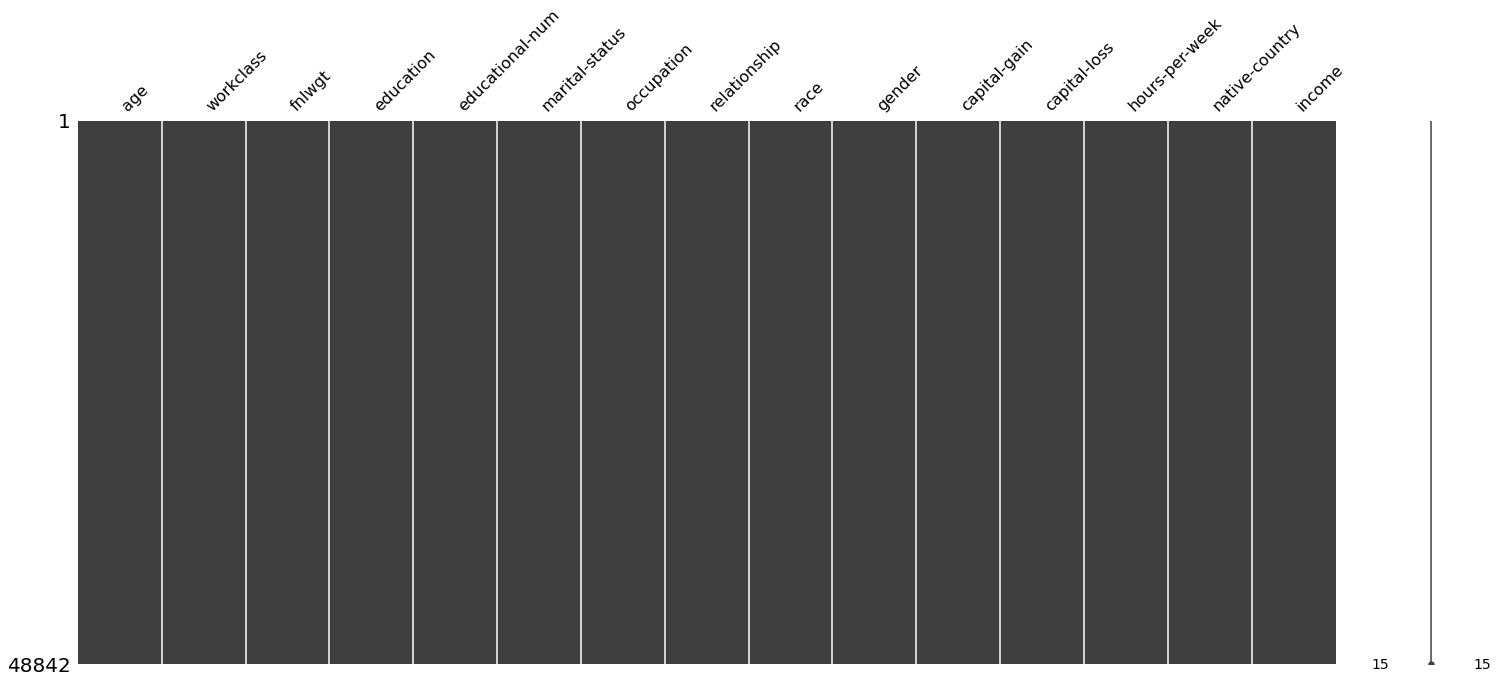

In [7]:
msno.matrix(data)

In [8]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
data.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [10]:
data.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [11]:
data.income = data.income.replace("<=50K", 0)
data.income = data.income.replace(">50K", 1)

In [12]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [13]:
#checking values for catagorical columns

cat_col = [ 'workclass', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
        'native-country']

In [14]:
data[cat_col].nunique()

workclass           9
education          16
educational-num    16
marital-status      7
occupation         15
relationship        6
race                5
gender              2
native-country     42
dtype: int64

In [15]:
for cat in data[cat_col]:
    print("\n", cat , "\n", "--"*5, "\n" , data[cat].value_counts())


 workclass 
 ---------- 
 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

 education 
 ---------- 
 HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

 educational-num 
 ---------- 
 9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

 marital-status 
 ---------- 
 Married

#### From above we can note the following : - 
#### 1. Column workclass has 2799 missing values.
#### 2. Column marital-status has too much in detail, can be more generalised
#### 3. Columns education and education-num represent same information.
#### 4. occupation colums has 2809 missing values
#### 5. native-country column has 857 missing values

In [16]:
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
2799
5.73%


occupation
2809
5.75%


native-country
857
1.75%




In [17]:
data.workclass.replace("?", np.nan, inplace = True)
data.occupation.replace("?", np.nan, inplace = True)
data["native-country"].replace("?", np.nan, inplace = True)

In [18]:
data["workclass"].dropna(how = "any", inplace = True)
data["occupation"].dropna(how = "any", inplace = True)
data["native-country"].dropna(how = "any", inplace = True)

In [19]:
data["marital-status"].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [20]:
data["marital-status"].replace("Married-civ-spouse", "Married", inplace = True)
data["marital-status"].replace("Married-spouse-absent", "Married", inplace = True)
data["marital-status"].replace("Married-AF-spouse", "Married", inplace = True)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
#Create dummies for the categorical columns
for cat in cat_col:
    dummy = pd.get_dummies(data[cat], prefix = cat+'_',drop_first=True)
    data = pd.concat([data,dummy], axis = 1)
print(data.shape)

(48842, 119)


In [23]:
# Columns education and education-num represent same information
data.drop(cat_col, axis=1, inplace=True)

In [24]:
data.head(2)

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass__Local-gov,workclass__Never-worked,workclass__Private,workclass__Self-emp-inc,...,native-country__Portugal,native-country__Puerto-Rico,native-country__Scotland,native-country__South,native-country__Taiwan,native-country__Thailand,native-country__Trinadad&Tobago,native-country__United-States,native-country__Vietnam,native-country__Yugoslavia
0,25,226802,0,0,40,0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,0,0,50,0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# checking for non catagorical columns
non_cat_col = ['age','fnlwgt', 'capital-gain',
       'capital-loss', 'hours-per-week', "income"]

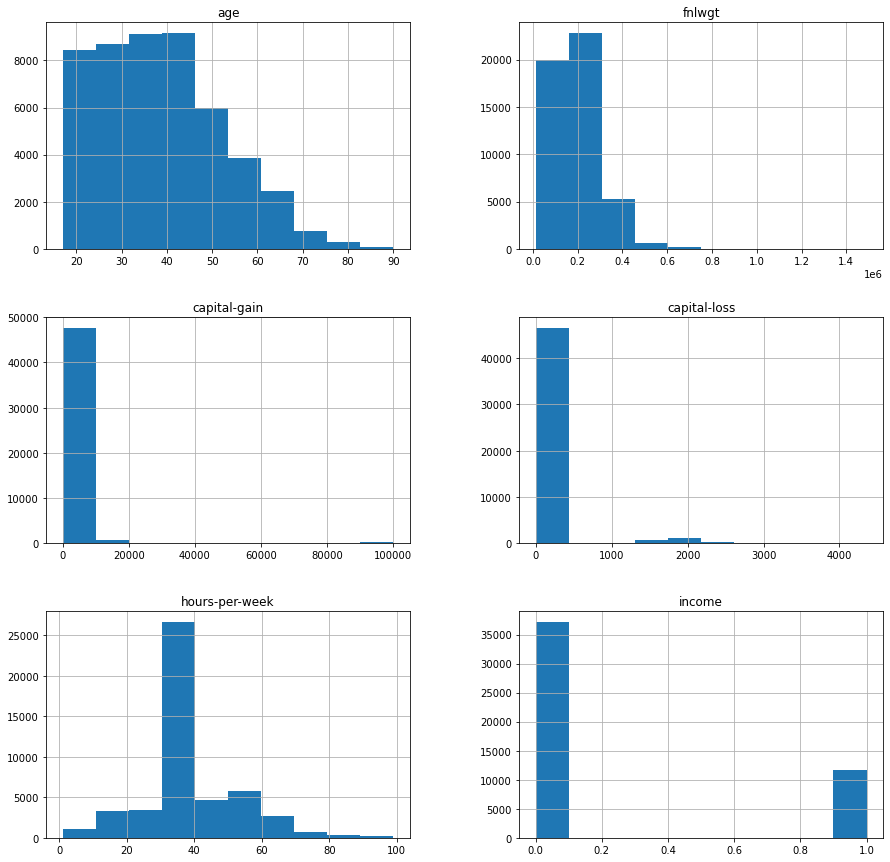

In [26]:
data[non_cat_col].hist(figsize=(15,15))
plt.show()

In [27]:
data[non_cat_col].corr()


,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.003706,-0.004366,-0.013519,-0.006339
capital-gain,0.077229,-0.003706,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.223013,0.147554,0.227687,1.000000


<AxesSubplot:>

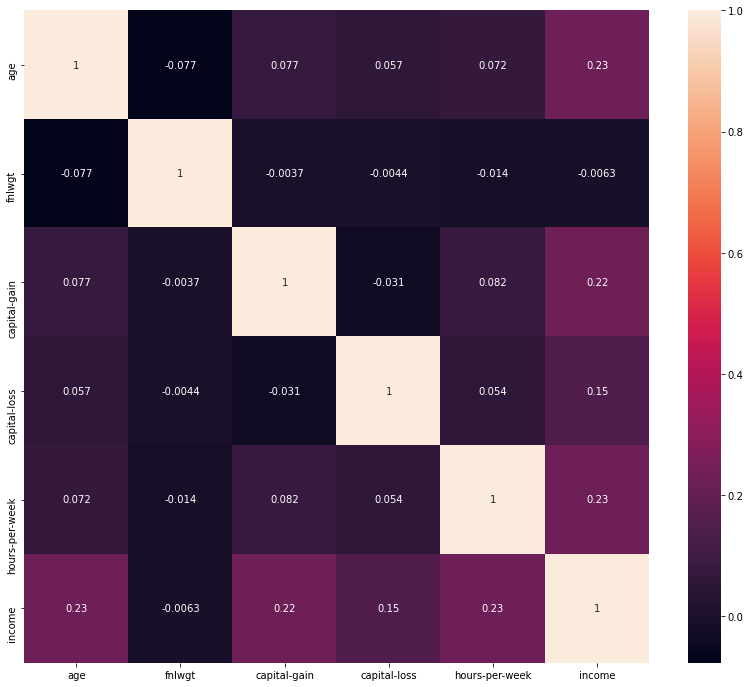

In [28]:
fig, ax = plt.subplots(figsize =(14, 12))
sns.heatmap(data[non_cat_col].corr(), annot= True, ax = ax)

In [29]:
# variable shows no correlation with income
data.drop("fnlwgt", axis=True, inplace = True)

In [30]:
data.head(2)

,age,capital-gain,capital-loss,hours-per-week,income,workclass__Local-gov,workclass__Never-worked,workclass__Private,workclass__Self-emp-inc,workclass__Self-emp-not-inc,...,native-country__Portugal,native-country__Puerto-Rico,native-country__Scotland,native-country__South,native-country__Taiwan,native-country__Thailand,native-country__Trinadad&Tobago,native-country__United-States,native-country__Vietnam,native-country__Yugoslavia
0,25,0,0,40,0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,38,0,0,50,0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
data.shape

(48842, 109)

In [32]:
from sklearn.model_selection import train_test_split
X = data.drop("income", axis = 1)
y = data.income

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [35]:
Xtrain_scaled = sc.fit_transform(X_train)
Xtest_scaled = sc.transform(X_test)

In [62]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic', n_estimators = 200)

In [63]:
xgb.fit(Xtrain_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
y_pred_train = xgb.predict(Xtrain_scaled)
y_pred_test = xgb.predict(Xtest_scaled)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
print("Train accuracy :", round(accuracy_score(y_train, y_pred_train), 2))
print("Test accuracy :", round(accuracy_score(y_test, y_pred_test), 2))

Train accuracy : 0.9
Test accuracy : 0.87


#### Lets try hyper parameter tuning using grid search

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
grid_params = {"earning_rate" : [0.3,0.4],
               "max_depth" : [6,8],
               "n_estimators" : [100],
               }

In [70]:
grid = GridSearchCV(XGBClassifier(objective='binary:logistic'),
                    param_grid=grid_params,
                    n_jobs= -1,
                   verbose = 1)

In [71]:
grid.fit(Xtrain_scaled, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.3min finished


[23:49:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { earning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_con...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                   

In [72]:
grid.best_params_

{'earning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100}

In [73]:
xgb_grid_search = grid.best_estimator_

In [74]:
xgb_grid_search.fit(Xtrain_scaled, y_train)

[23:50:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { earning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, earning_rate=0.3, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
y_pred_train = xgb_grid_search.predict(Xtrain_scaled)
y_pred_test = xgb_grid_search.predict(Xtest_scaled)

print("Train accuracy :", round(accuracy_score(y_train, y_pred_train), 2))
print("Test accuracy :", round(accuracy_score(y_test, y_pred_test), 2))

Train accuracy : 0.89
Test accuracy : 0.87


In [49]:
#### Lets try hyperparameter tuning by randomizes search CV

In [76]:
from sklearn.model_selection import RandomizedSearchCV
rscv = grid_params = {"earning_rate" : [0.3,0.4],
               "max_depth" : [6,7],
               "n_estimators" : [600,800],
               }

In [77]:
rscv = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'),
                          param_distributions = grid_params, 
                          n_iter= 5)

In [78]:
rscv.fit(Xtrain_scaled, y_train)

[23:50:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { earning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:50:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { earning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:51:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { earning_rate } might not be used.

  This may not be accurate due to some parameters are only used in la

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monoto...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                    

In [79]:
rscv.best_params_

{'n_estimators': 600, 'max_depth': 6, 'earning_rate': 0.3}

In [80]:
xgb_rscv = rscv.best_estimator_

In [81]:
xgb_rscv.fit(Xtrain_scaled, y_train)

[23:58:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { earning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, earning_rate=0.3, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
y_pred_train = xgb_rscv.predict(Xtrain_scaled)
y_pred_test = xgb_rscv.predict(Xtest_scaled)

print("Train accuracy :", round(accuracy_score(y_train, y_pred_train), 2))
print("Test accuracy :", round(accuracy_score(y_test, y_pred_test), 2))

Train accuracy : 0.92
Test accuracy : 0.87
